## Solutions

In [3]:
from quantecon import ar_periodogram

### Exercise 1

/home/quantecon/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


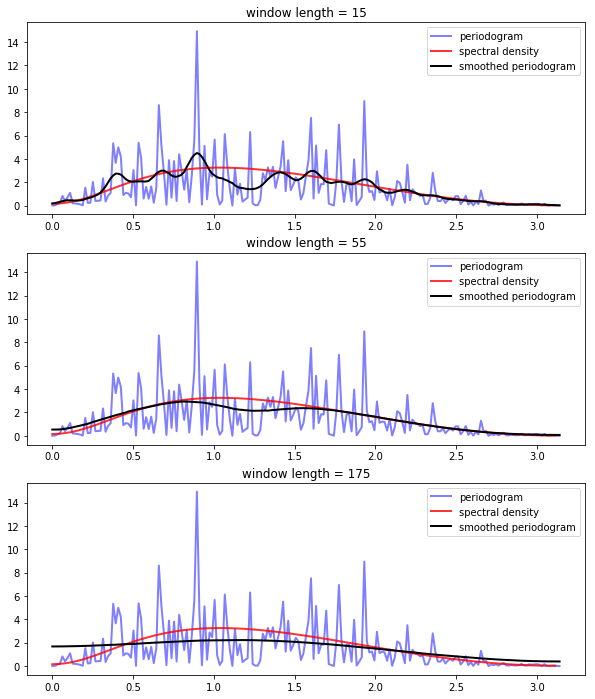

In [4]:
## Data
n = 400
ϕ = 0.5
θ = 0, -0.8
lp = ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

for i, wl in enumerate((15, 55, 175)):  # window lengths

    x, y = periodogram(X)
    ax[i].plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
    ax[i].plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].plot(x, y_smoothed, 'k-', lw=2, label='smoothed periodogram')

    ax[i].legend()
    ax[i].set_title(f'window length = {wl}')
plt.show()

### Exercise 2

/home/quantecon/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


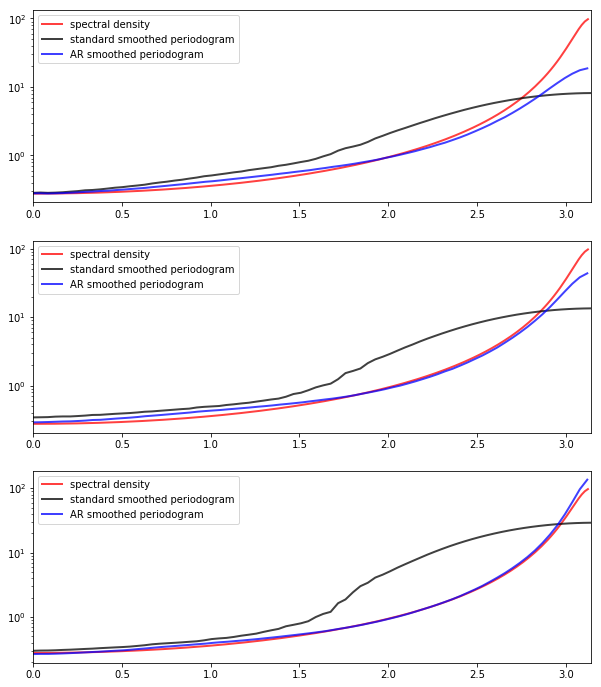

In [5]:
lp = ARMA(-0.9)
wl = 65


fig, ax = plt.subplots(3, 1, figsize=(10,12))

for i in range(3):
    X = lp.simulation(ts_length=150)
    ax[i].set_xlim(0, np.pi)

    x_sd, y_sd = lp.spectral_density(two_pi=False, res=180)
    ax[i].semilogy(x_sd, y_sd, 'r-', lw=2, alpha=0.75, label='spectral density')

    x, y_smoothed = periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_smoothed, 'k-', lw=2, alpha=0.75, label='standard smoothed periodogram')

    x, y_ar = ar_periodogram(X, window='hamming', window_len=wl)
    ax[i].semilogy(x, y_ar, 'b-', lw=2, alpha=0.75, label='AR smoothed periodogram')

    ax[i].legend(loc='upper left')
plt.show()